In [103]:
import warnings
warnings.filterwarnings('ignore')

In [104]:
import pandas as pd
dataset = pd.read_csv('glass.csv')

In [105]:
dataset.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [106]:
dataset.shape

(214, 10)

In [107]:
dataset['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [108]:
dataset.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [110]:
model=scaler.fit(X)
X=model.transform(X)
X

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

- There are two ways to select value of k:
    1. Train-Test-Split
    2. Cross Validation Method

### Train-Test-Split Method for finding value of k:

In [111]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, shuffle=True)

In [112]:
x_train

array([[0.17251975, 0.66466165, 0.        , ..., 0.2704461 , 0.2       ,
        0.        ],
       [0.25109745, 0.37593985, 0.78841871, ..., 0.24814126, 0.        ,
        0.        ],
       [0.70676032, 0.46165414, 0.70155902, ..., 0.57713755, 0.        ,
        0.        ],
       ...,
       [0.23266023, 0.63308271, 0.        , ..., 0.30111524, 0.43809524,
        0.        ],
       [0.29455663, 0.30075188, 0.76391982, ..., 0.30947955, 0.        ,
        0.58823529],
       [0.26075505, 0.34135338, 0.77282851, ..., 0.25557621, 0.        ,
        0.        ]])

In [113]:
y_train

200    7
122    2
103    2
46     1
161    3
      ..
99     2
71     2
206    7
44     1
143    2
Name: Type, Length: 149, dtype: int64

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# randomly taken k=3
# not exactly the best way
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_hat = model.predict(x_test)
accuracy_score(y_hat,y_test)

0.7538461538461538

### Cross Validation Method to find value of k:

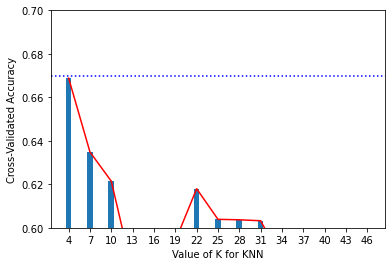

In [115]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 1 to 41
k_range = [3*i+4 for i in range(0,15)]
k_scores =[]

# using iteration to calculate different k in module, the nreturn the average accuracy
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X,y, cv=10)
    k_scores.append(scores.mean())
    
# plot
plt.bar(k_range, k_scores)
plt.plot(k_range,k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.axhline(y = 0.670, color = 'b', linestyle = ':')
plt.xticks(k_range)
plt.ylim(0.6,0.7)
plt.show()

### Optimal Value of k using range function with KNN:

In [120]:
k_range = range(3,40,2)
k_scores =[]
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    y_hat = model.predict(x_test)
    scores = accuracy_score(y_test,y_hat)
    k_scores.append(scores)

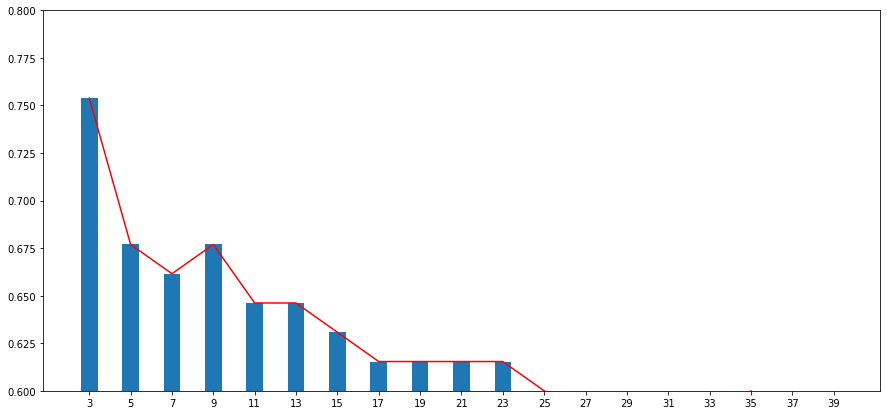

In [122]:
plt.figure(figsize=(15,7))
plt.bar(k_range,k_scores)
plt.plot(k_range,k_scores, color="red")
plt.xticks(k_range)
plt.ylim(0.6,0.8)
plt.show()